Importing handy libraries

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


Getting and visualizing our dataset

In [2]:
df_train = pd.read_csv("data/train.csv")

df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
# saving df to excel file for soft data thinkering

# df_train.to_excel('df_train.xlsx', index='False')
# print("df saved to excel")

# 1 - Data exploration

Getting a sense of our target dependant variable

In [4]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

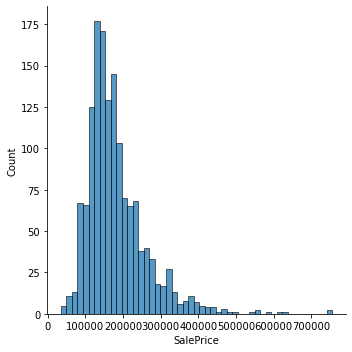

In [5]:
sns.displot(df_train['SalePrice'], kind='hist')

We can see that the skewness is positive (long tail with bigger values than mean), with high kurtosis (rapid declining of the curve around the mean)

In [6]:
print('Skewness: {:.2f}'.format(df_train['SalePrice'].skew()),
      '\nkurtosis: {:.2f}'.format(df_train['SalePrice'].kurt()))


Skewness: 1.88 
kurtosis: 6.54


With a correlation matrix, we can see what are the most correlated variables to the target SalePrice

<AxesSubplot:>

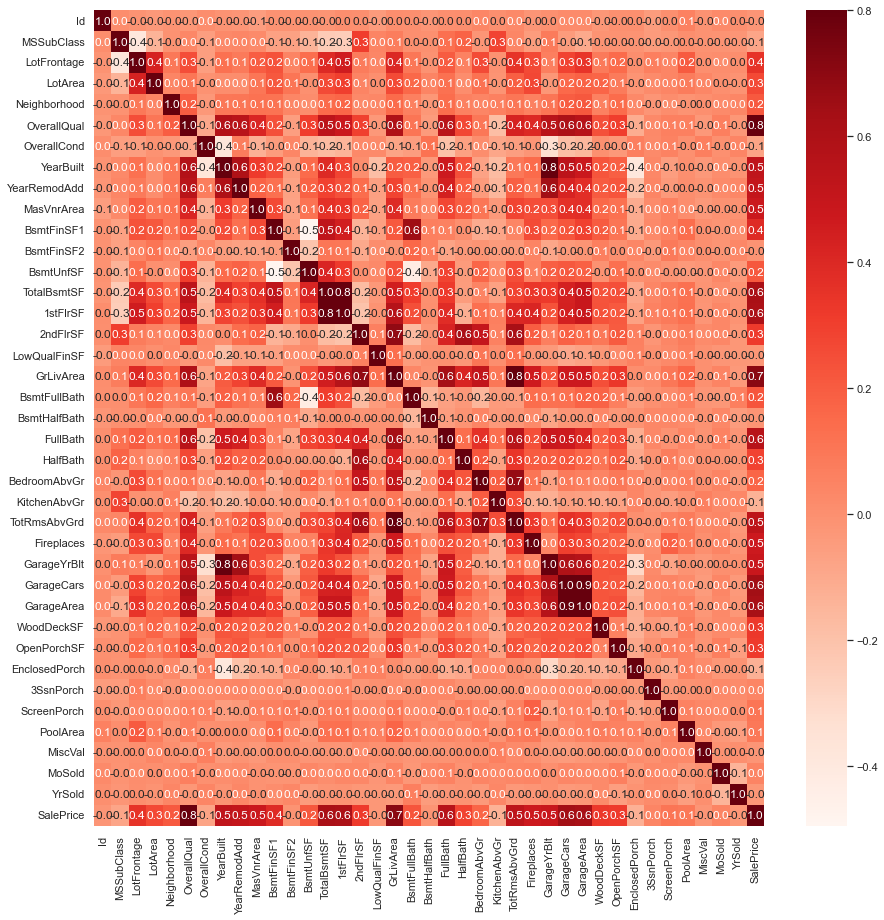

In [69]:
sns.set()
plt.figure(figsize=(15, 15))
sns.heatmap(data=df_train.corr(), annot=True, fmt='.1f', vmax=0.8, 
            cmap=plt.cm.Reds)


As we can see, the variables GarageCars and GarageArea reprsent the issue of multicollinearity, highly correlated even tho they are independant in theory. This issue is also seen between 'TotalBsmtSF' and '1stFlrSF' variables.

Lets take a look at the top 4 most relevant variables: OverallQual, YearBuilt, TotalBsmtSF and GrLivArea => high correlation with our target

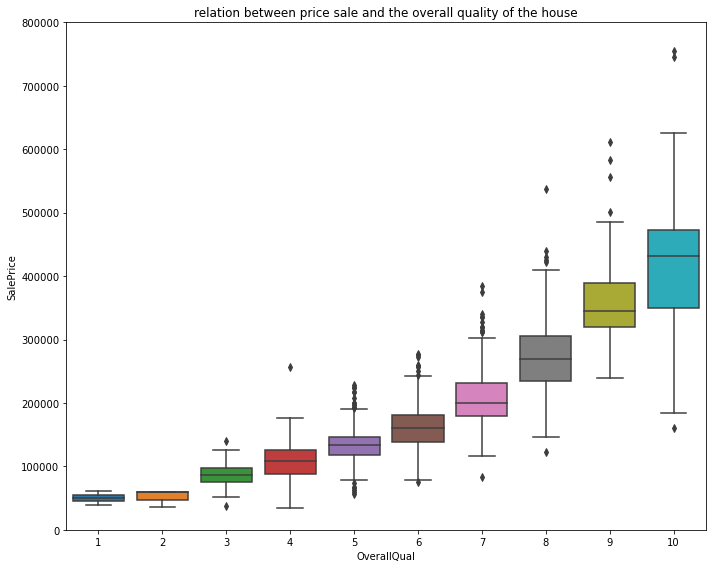

In [7]:
# Overall quality of the house seens to be impactfull, the better the costier

fig, axis = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=df_train['OverallQual'], y=df_train['SalePrice'])
fig.axis(ymin=0, ymax=800000)
axis.title.set_text('relation between price sale and the overall quality of the house')
plt.tight_layout()
plt.show()

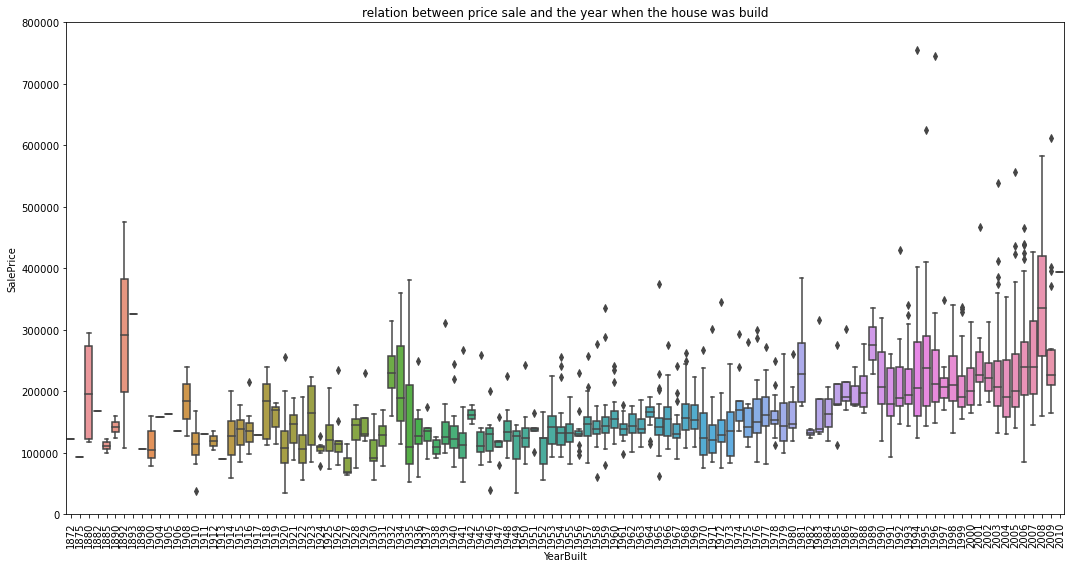

In [8]:
# YearBuilt seens to be  slightly impactfull, the more recently built the higher the price

fig, axis = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x=df_train['YearBuilt'], y=df_train['SalePrice'])
fig.axis(ymin=0, ymax=800000)
axis.title.set_text('relation between price sale and the year when the house was build')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

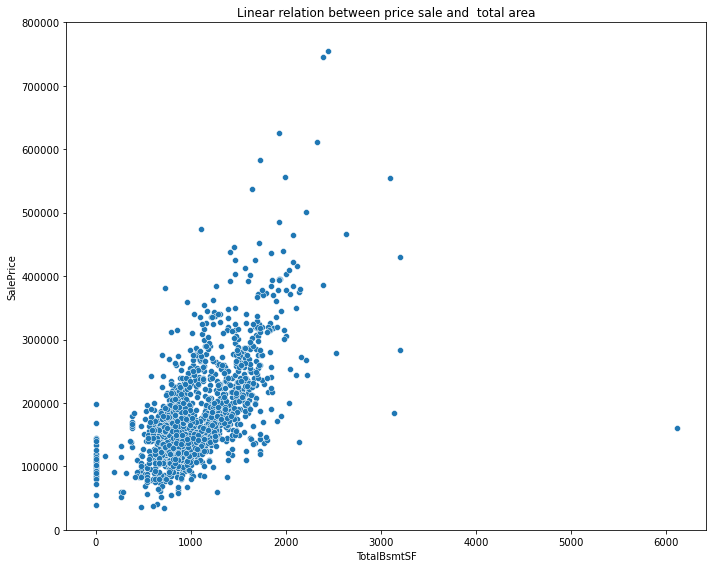

In [9]:
# TotalBsmtSF seens to be impactfull, the more square meters  the higher the price

fig, axis = plt.subplots(figsize=(10, 8))
fig = sns.scatterplot(x=df_train['TotalBsmtSF'], y=df_train['SalePrice'])
fig.axis(ymin=0, ymax=800000)
axis.title.set_text('Linear relation between price sale and  total area')
plt.tight_layout()
plt.show()

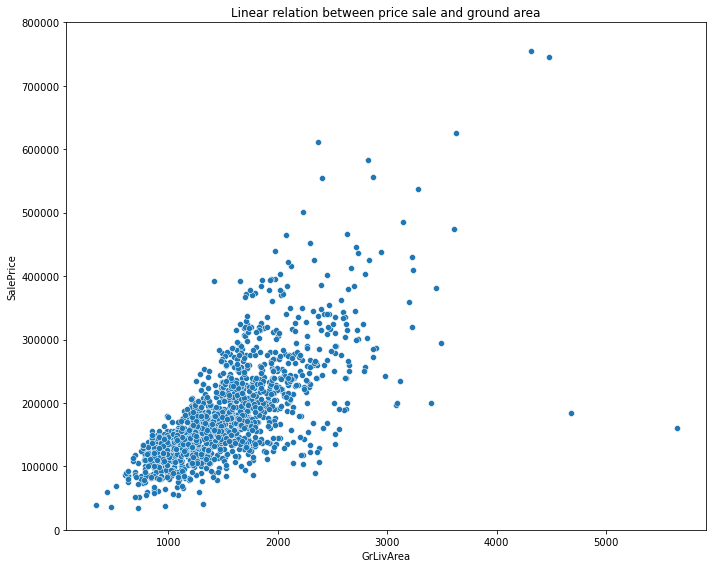

In [10]:
# GrLivArea seens to be impactfull, the more square meters in the ground where the house belongs,  the higher the price
fig, axis = plt.subplots(figsize=(10, 8))
fig = sns.scatterplot(x=df_train['GrLivArea'], y=df_train['SalePrice'])
#plt.title('Linear relation between price sale and ground area')
fig.axis(ymin=0, ymax=800000)
axis.title.set_text('Linear relation between price sale and ground area')
plt.tight_layout()
plt.show()

In [11]:
# A variable that a expect to be relevation is the area location, so lets see
# transforming the string data into categorical, and geting codes of the names of the locations


df_train['Neighborhood'] = df_train['Neighborhood'].astype('category').cat.codes
df_train['Neighborhood'].head(10)

0     5
1    24
2     5
3     6
4    15
5    11
6    21
7    14
8    17
9     3
Name: Neighborhood, dtype: int8

Testing a variable that people usually expects to be highly correlated with the house pricing: Location/ neighborhood

As we can see, thats not the case, as in the heat map, the correlation is about only 20%

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

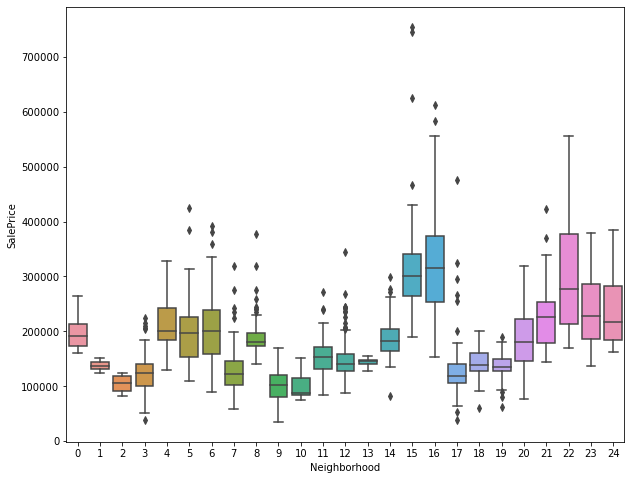

In [12]:
# As we can see, the prices of each area are widely ranged, 
# so it is not good for correlation and we will keep our 4 most relevant data

plt.figure(figsize=(10,8))
sns.boxplot(x=df_train['Neighborhood'], y=df_train['SalePrice'])

Now, we should take in account other relevants variable shown in the heatmap, so now we gonna get a heatmap with the 10 variables with the most high corr with 'SalePrice'

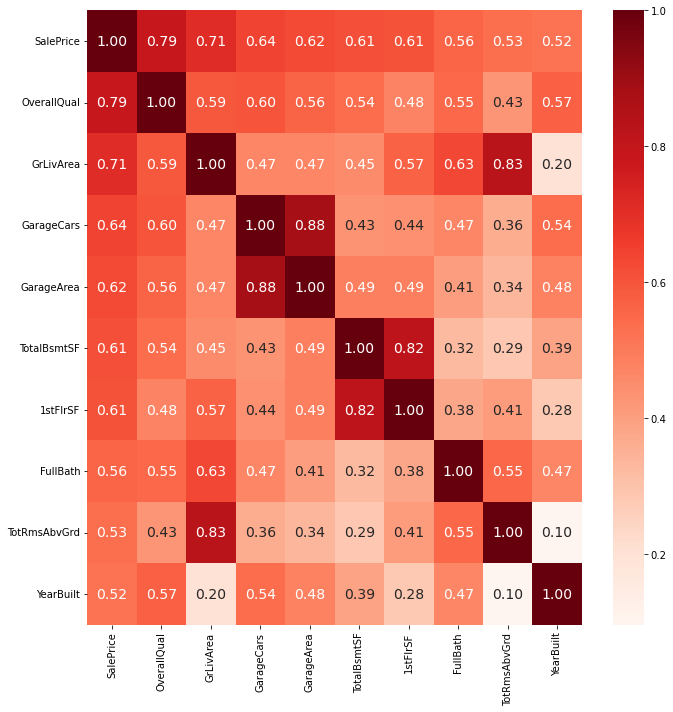

In [68]:
# Top 10 variables corr with saleprice

k = 10
cols = df_train.corr().nlargest(k, 'SalePrice')['SalePrice'].index # cols names of the top10 values
top_features_matrix = df_train.corr().nlargest(k, 'SalePrice') # top 10 rows with all columns
top_features_matrix = df_train.corr()[cols].nlargest(k, 'SalePrice') # top 10 rows with top 10 cols
top_features = df_train.corr().nlargest(k, 'SalePrice')['SalePrice'] # series with top 10 highest values

plt.figure(figsize=(10, 10))
sns.heatmap(data=top_features_matrix, annot=True, fmt='.2f', square=False, cmap=plt.cm.Reds, annot_kws={'size': 14},
           yticklabels=cols.values, xticklabels=cols.values, vmax=1)
plt.tight_layout()
plt.show()


We gonna keep the already analised: 'OverallQual', 'GrLivArea' and 'TotalBsmtSF'

Also, GarageCars from the GarageCars and garageArea, as they both give same info, and the latter give less corr with our target

Also, TotalBsmtSF from the TotalBsmtSF and 1stFloor, as they both give same info, and the latter give less corr with our target 

Also, GrLivArea from the GrLivArea and TotRmsAbvGrd, as they both give same info, and the latter give less corr with our target 

FullBath

YearBuilt

## Lets see the relations between all these features with scatterplots

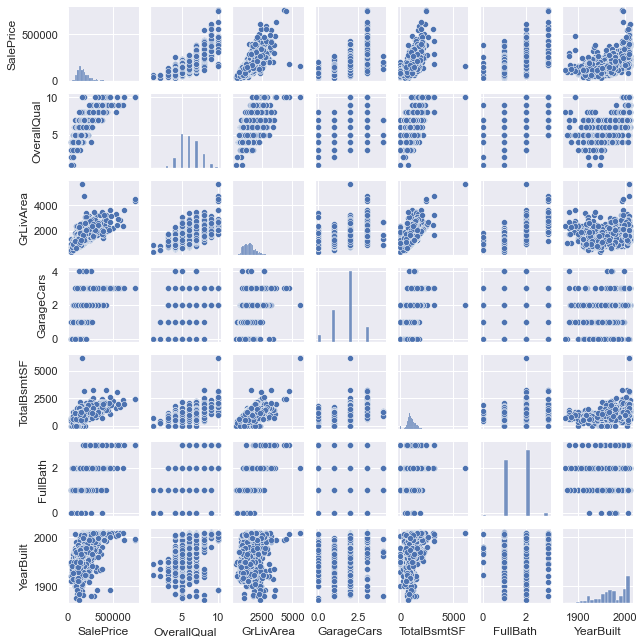

In [75]:
# so now, lets take a look on all scatter plots from these choosen cols
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

sns.pairplot(df_train[cols], size=1.3)
plt.show()


From this plot, we can see that Overallquality really increases with the quality of the house,e.g, the more space in the basement (TotalBsmtSF ), the better

Also, saleprice seens to increase exponentially as the yearbuilt become more recently

### Handling missing data